# Assignement 3

## Imports and installs

In [39]:
%pip install numpy pandas sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [40]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import preprocessing
import matplotlib.pyplot as plt 

## Task 0

In [41]:
data = pd.read_csv("./data/iris_clusters.csv", delimiter=";")
data

,pl,pw,sl,sw,id
0,6.7,3.0,4.6,1.5,87.0
1,6.7,2.8,4.6,1.2,209.0
2,5.0,3.6,1.6,0.5,344.0
3,6.3,3.1,5.9,2.5,401.0
4,7.0,2.9,5.7,1.7,430.0
...,...,...,...,...,...
295,6.8,3.0,5.0,2.5,14842.0
296,5.7,2.6,4.9,1.9,14843.0
297,5.6,3.4,1.2,0.2,14887.0
298,5.4,2.6,4.3,1.2,14941.0


## Task 1 K-means

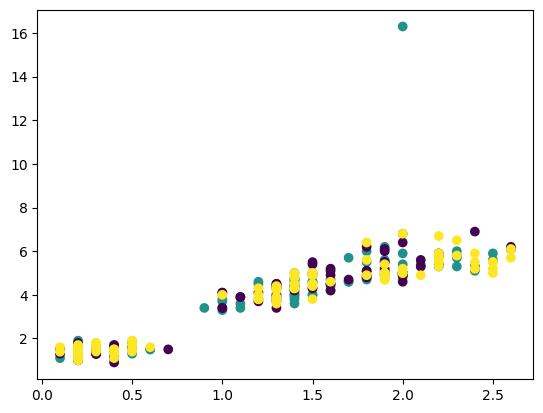

In [42]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(data)

plt.scatter(data["sw"], data["sl"], c=kmeans.labels_, cmap='viridis') 
plt.show()

They don't coincide with the previously mentioned groups

## TASK 2: preprocessing

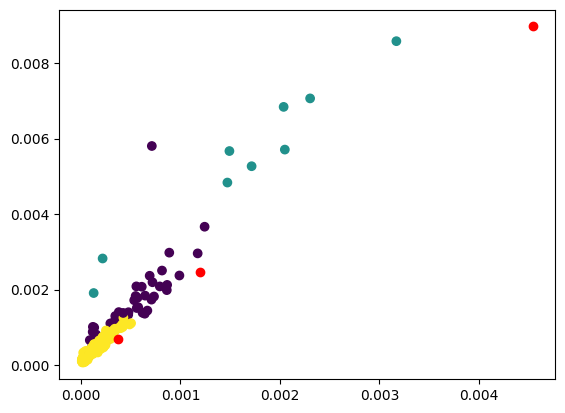

[[2.46898967e-03 1.20057165e-03 1.55640056e-03 4.92204315e-04
  9.99993771e-01]
 [8.97017909e-03 4.54191417e-03 5.41232941e-03 1.62081914e-03
  9.99929349e-01]
 [6.90625393e-04 3.71994429e-04 4.16367909e-04 1.38517773e-04
  9.99999495e-01]]
52
9
234


In [61]:
ndata = preprocessing.normalize(data)

from scipy import stats

z_scores = np.abs(stats.zscore(ndata))
outliers_mask = (z_scores < 3).all(axis=1)
data_clean = ndata[outliers_mask]
#display(ndata)
#display(data_clean)

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(data_clean)

plt.scatter(data_clean[:, 3], data_clean[:, 2], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:, 0], c = 'r')
plt.show()  
print(kmeans.cluster_centers_)
print(kmeans.labels_.tolist().count(0))
print(kmeans.labels_.tolist().count(1))
print(kmeans.labels_.tolist().count(2))

## Task 4

In [59]:
from sklearn import metrics
for k in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(data_clean)
    print(kmeans)
    print(metrics.davies_bouldin_score(data_clean, kmeans.labels_))

KMeans(n_clusters=2)
0.38361221188293804
KMeans(n_clusters=3)
0.5907108365154169
KMeans(n_clusters=4)
0.7874691288397839
KMeans(n_clusters=5)
0.759486246810533
KMeans(n_clusters=6)
0.8136388468460373
KMeans(n_clusters=7)
0.7312957672938447
KMeans()
0.605550441907206
KMeans(n_clusters=9)
0.6628693121873521
